<h3>SVM</h3>

In [1]:
# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

<h3>Load dataset</h3>

In [2]:
# Load dataset
iris = datasets.load_iris()

In [3]:
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target  # add target column

# Inspect
print("SHAPE",df.shape,"\n\n")          # shape of dataset
print("Columns List",df.columns.tolist(),"\n\n")  # column names
print("Head",df.head(),"\n\n")         # first few rows

SHAPE (150, 5) 


Columns List ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target'] 


Head    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   




In [4]:
X = iris.data[:, :2]  # Using first two features for easy visualization
y = iris.target

<h3>Split data into train and test</h3>

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Print first 5 rows of scaled training data
print("Scaled X_train (first 5 rows):")
print(X_train_scaled[:5])

# Print first 5 rows of scaled test data
print("\nScaled X_test (first 5 rows):")
print(X_test_scaled[:5])

# Check mean and std to confirm scaling
print("\nMean of each feature in X_train_scaled:", X_train_scaled.mean(axis=0))
print("Std of each feature in X_train_scaled:", X_train_scaled.std(axis=0))


Scaled X_train (first 5 rows):
[[-0.4134164  -1.46200287]
 [ 0.55122187 -0.50256349]
 [ 0.67180165  0.21701605]
 [ 0.91296121 -0.02284379]
 [ 1.63643991  1.41631528]]

Scaled X_test (first 5 rows):
[[ 0.3100623  -0.50256349]
 [-0.17225683  1.89603497]
 [ 2.23933883 -0.98228318]
 [ 0.18948252 -0.26270364]
 [ 1.15412078 -0.50256349]]

Mean of each feature in X_train_scaled: [ 2.57148800e-15 -9.89254974e-16]
Std of each feature in X_train_scaled: [1. 1.]


<h3>Create SVM classifier (using RBF kernel)</h3>

In [7]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC()

<h3>Make predictions</h3>

In [8]:
# Make predictions
y_pred = svm_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0,
       0])

<h3>Evaluate</h3>

In [9]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



<h3>Plot</h3>

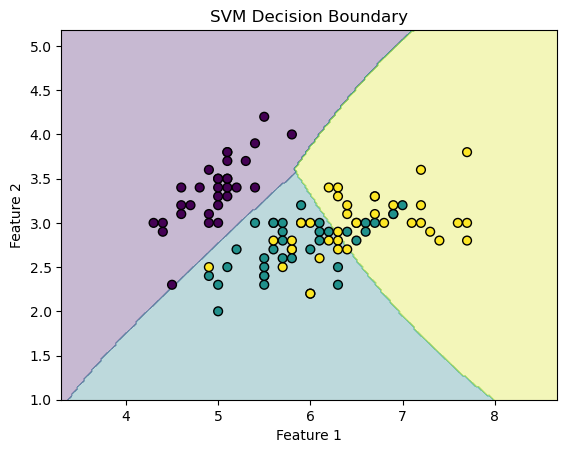

In [10]:
# Optional: visualize decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

plot_decision_boundary(X_train, y_train, svm_model)


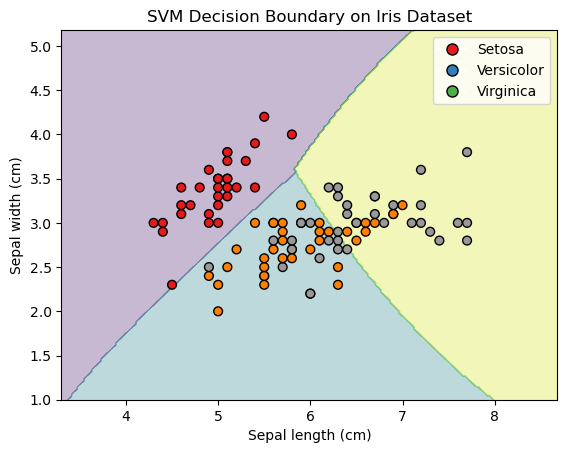

In [11]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Scatter plot of actual points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.Set1)
    
    # Feature labels
    plt.xlabel('Sepal length (cm)')
    plt.ylabel('Sepal width (cm)')
    plt.title('SVM Decision Boundary on Iris Dataset')
    
    # Add legend for classes
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Setosa', markerfacecolor=plt.cm.Set1(0), markersize=8, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='Versicolor', markerfacecolor=plt.cm.Set1(1), markersize=8, markeredgecolor='k'),
        Line2D([0], [0], marker='o', color='w', label='Virginica', markerfacecolor=plt.cm.Set1(2), markersize=8, markeredgecolor='k')
    ]
    plt.legend(handles=legend_elements)
    
    plt.show()

# Call the function with your training data and model
plot_decision_boundary(X_train, y_train, svm_model)
